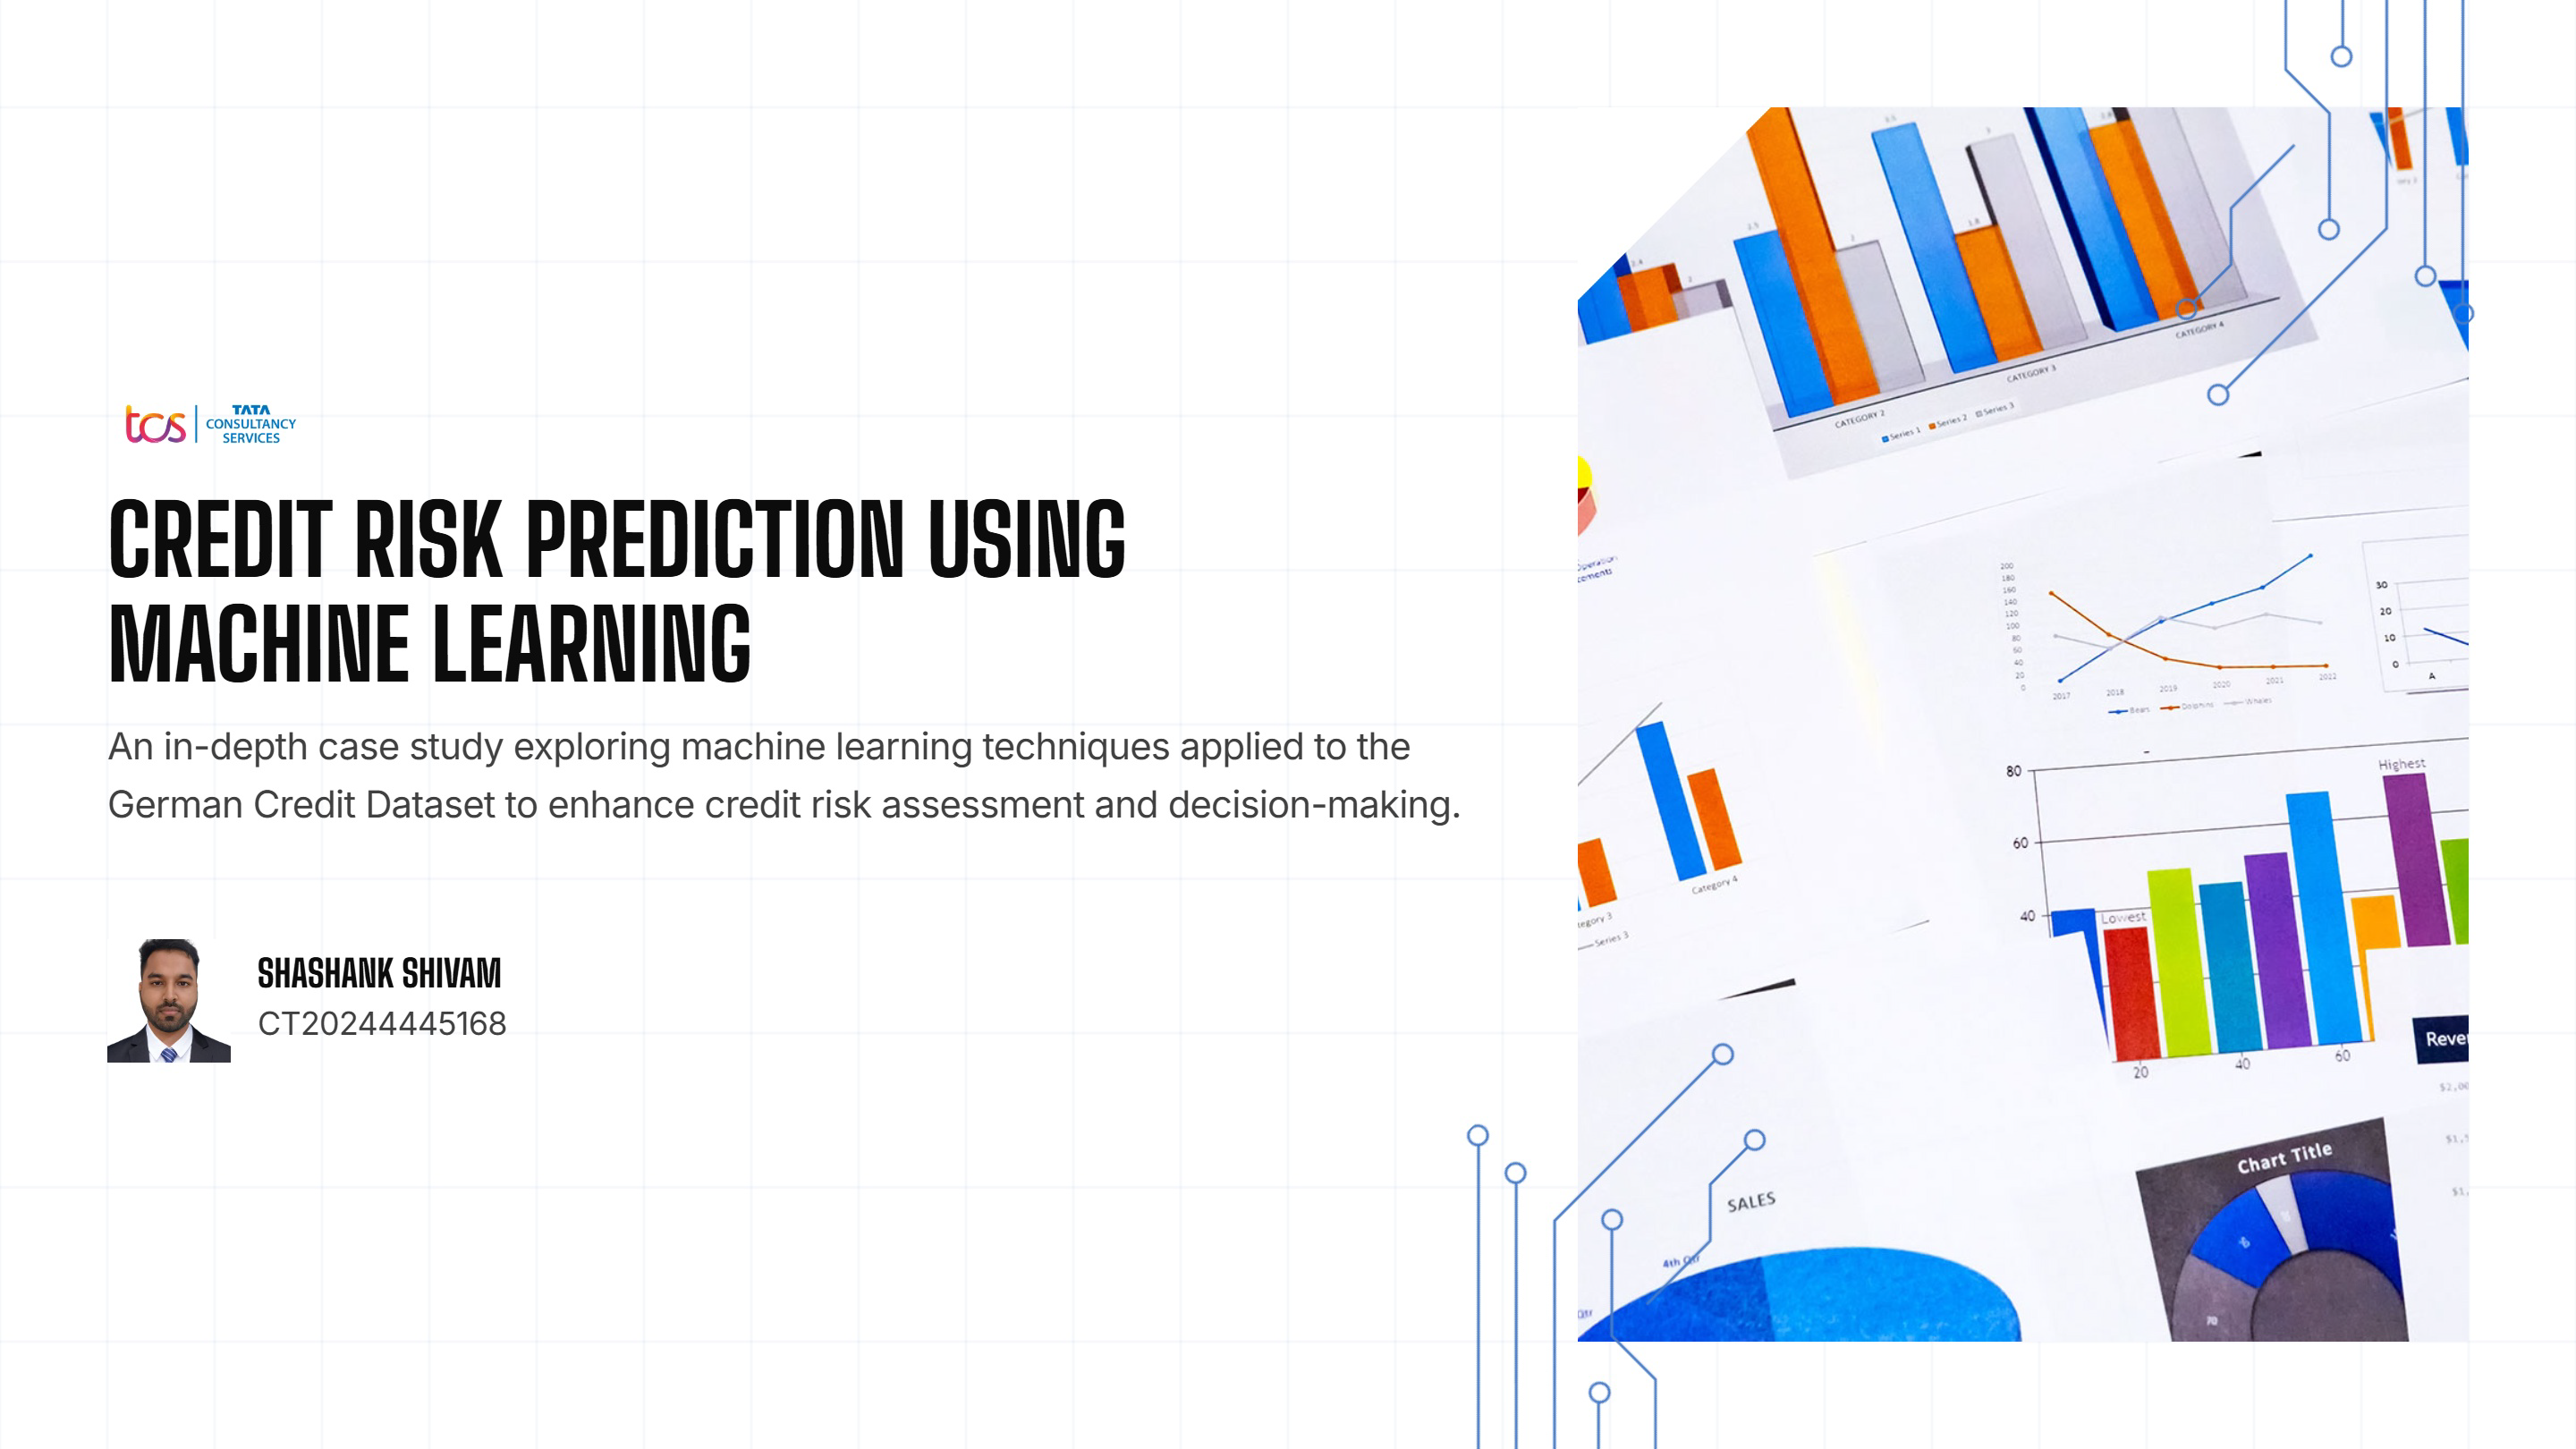

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [ ]:
df = pd.read_csv('german_credit_data.csv', index_col=0)
df[['Saving accounts', 'Checking account']] = df[['Saving accounts', 'Checking account']].fillna('unknown')
df['Credit_per_Duration'] = df['Credit amount'] / df['Duration']
median_credit = df['Credit amount'].median()
df['Risk'] = np.where(df['Credit amount'] > median_credit, 1, 0)

## Visualisation


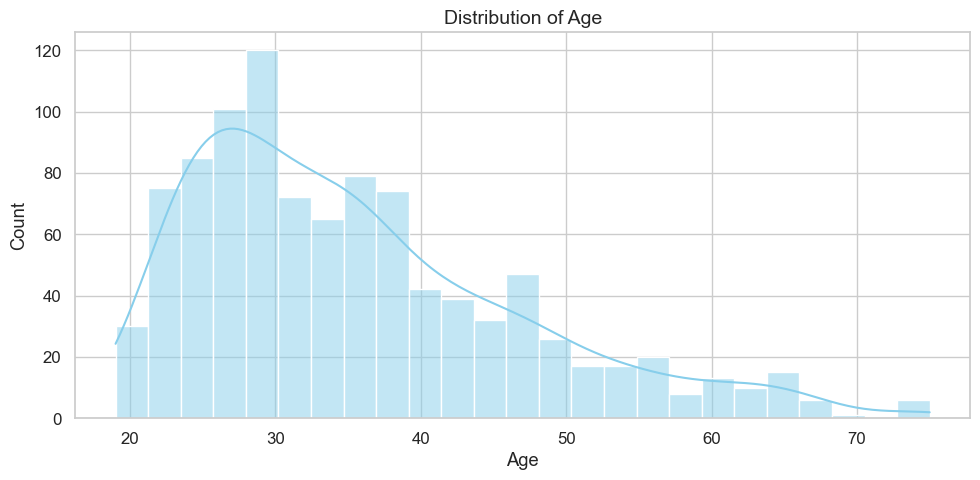

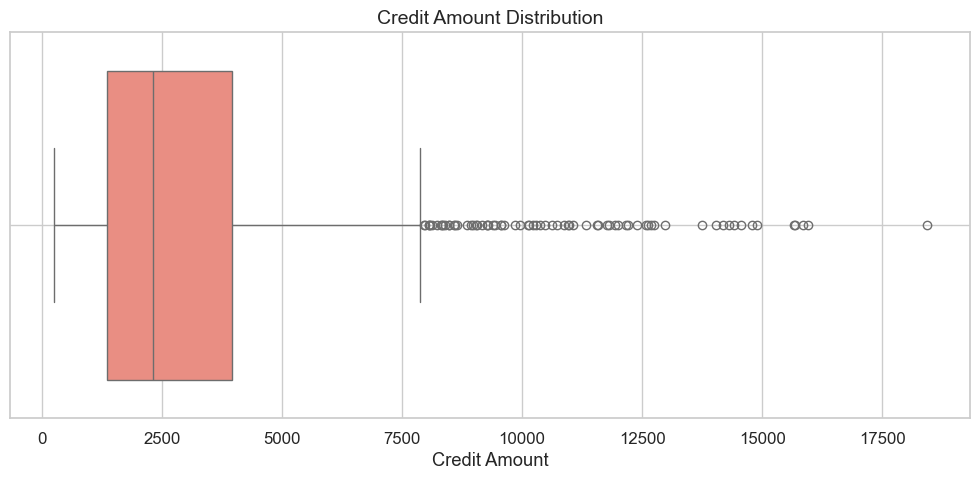

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9188\4013335014.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Housing', y='Credit amount', palette='Set3')


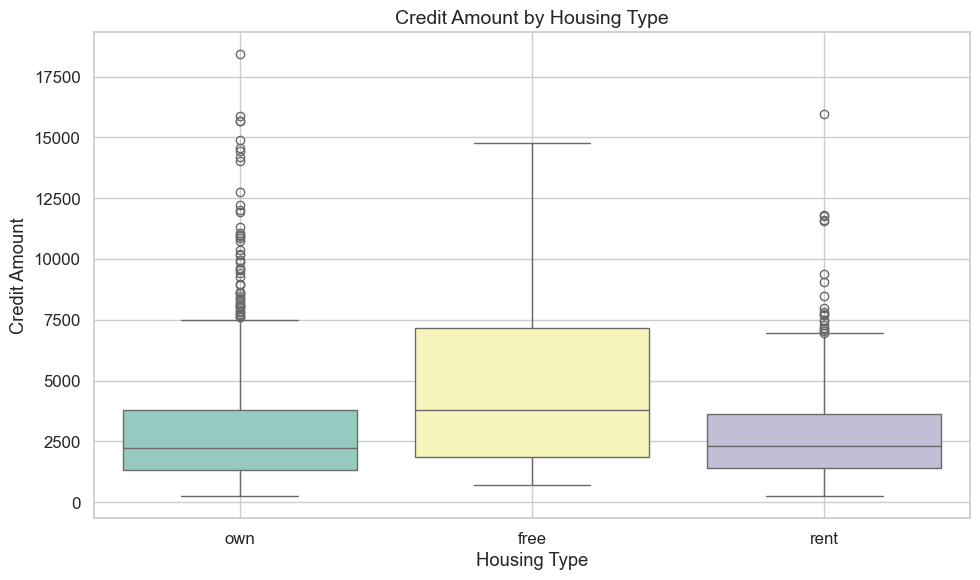

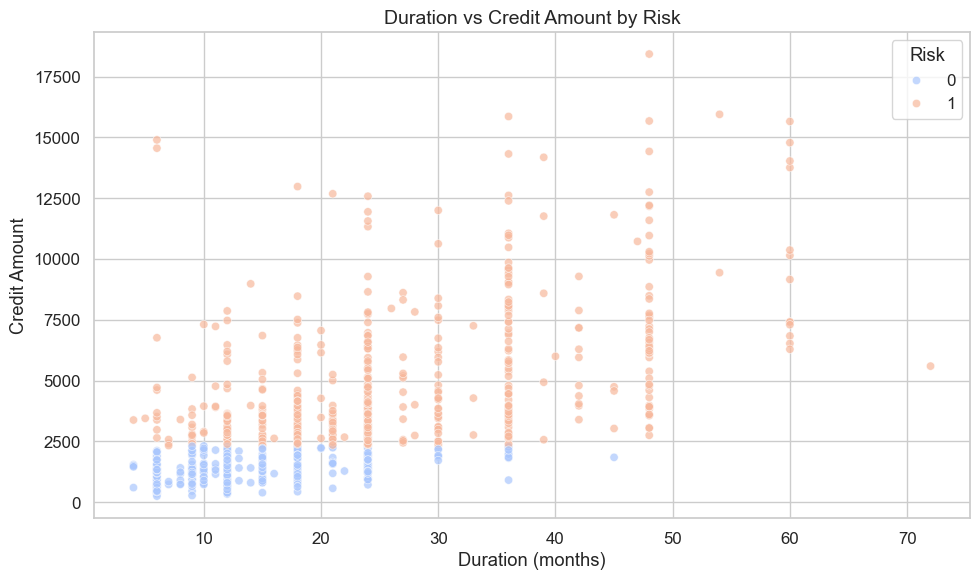

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9188\4013335014.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Saving accounts', order=df['Saving accounts'].value_counts().index, palette='pastel')


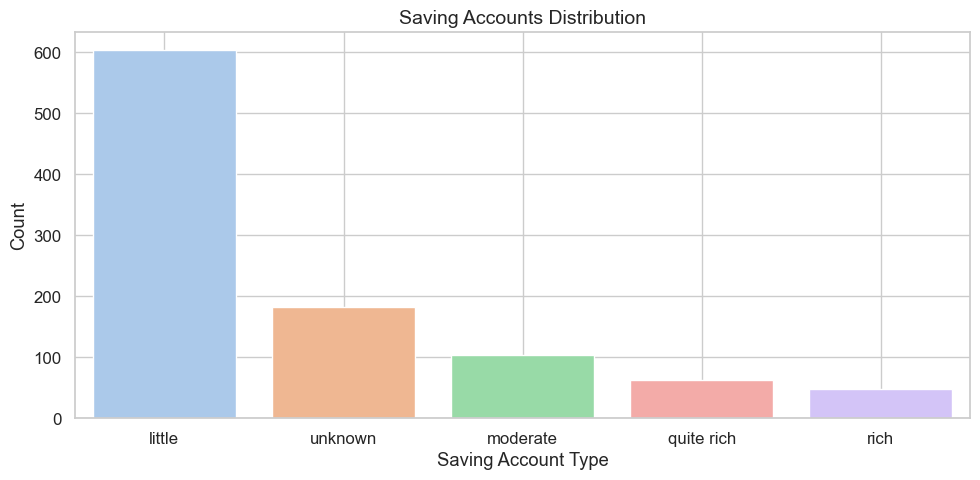

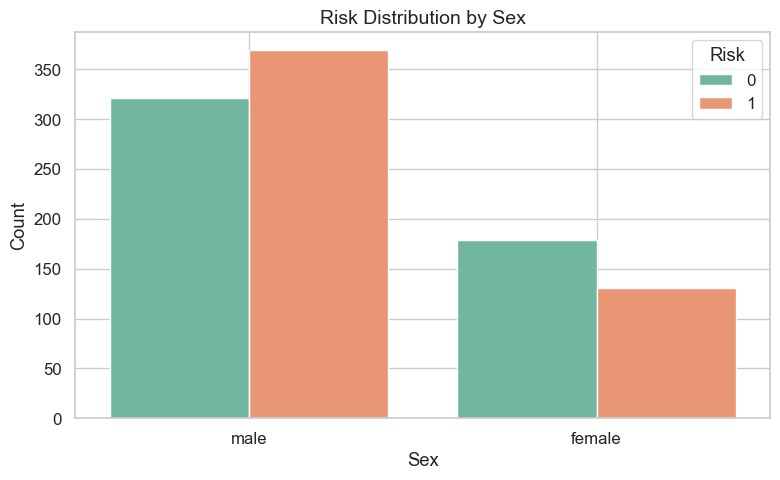

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9188\4013335014.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Purpose', y='Credit amount', estimator=np.mean, palette='Blues_d')


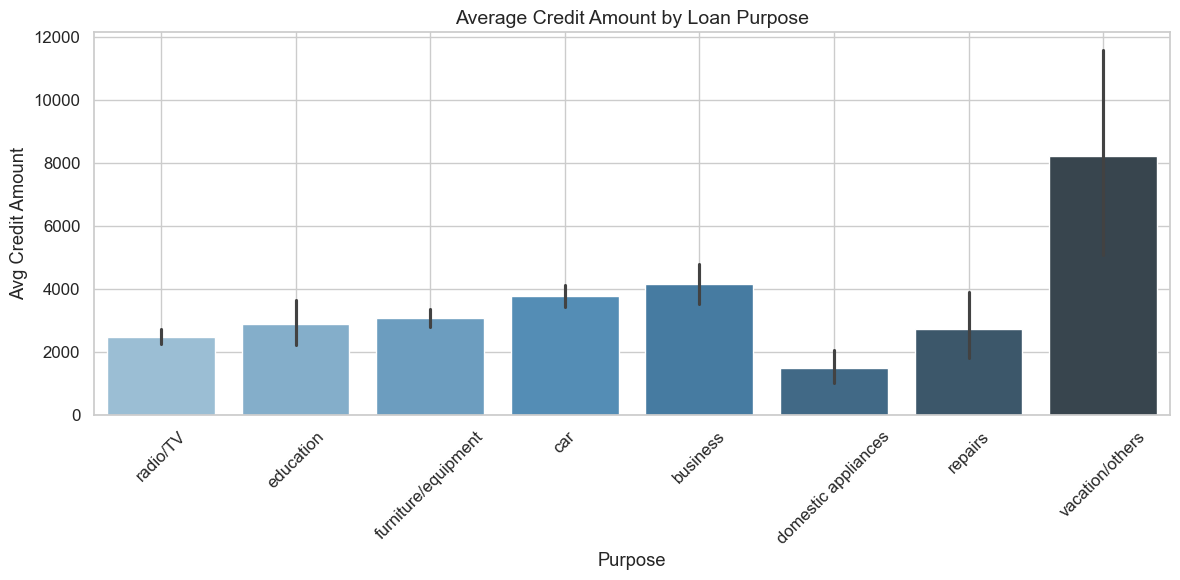

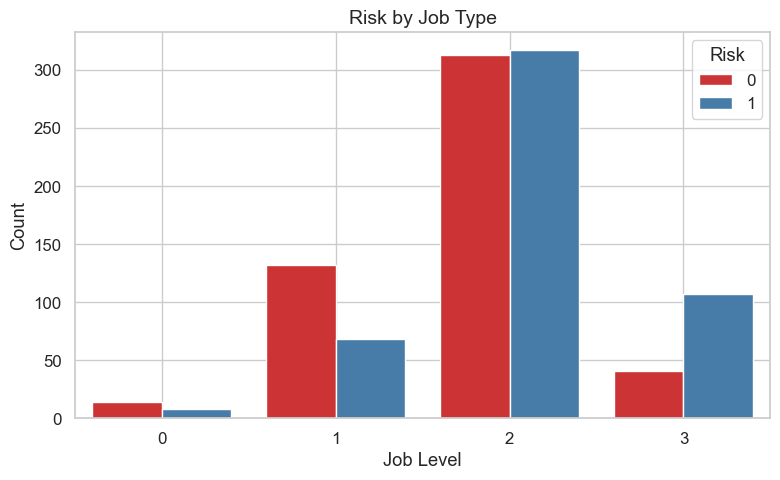

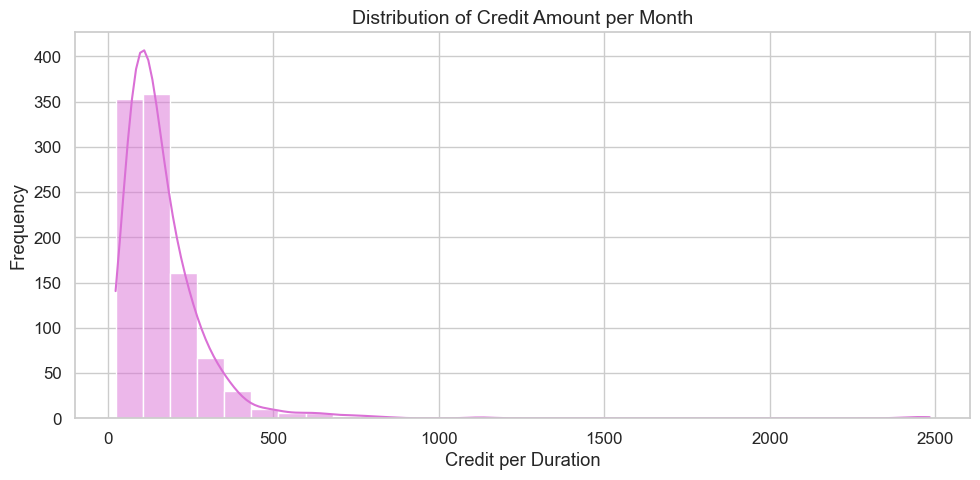

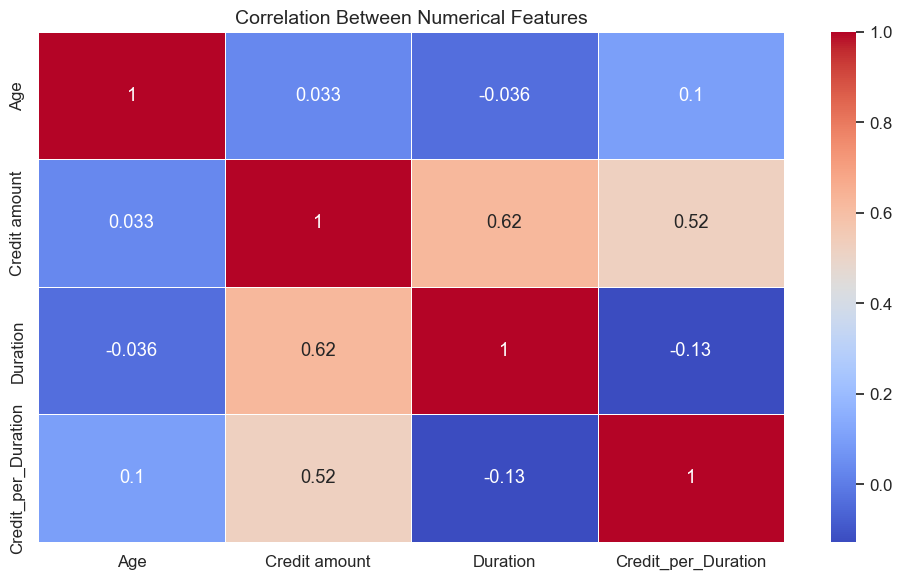

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.1) 
# 1. Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=25, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Credit Amount Distribution (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Credit amount'], color='salmon')
plt.title('Credit Amount Distribution', fontsize=14)
plt.xlabel('Credit Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Credit Amount by Housing Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Housing', y='Credit amount', palette='Set3')
plt.title('Credit Amount by Housing Type', fontsize=14)
plt.xlabel('Housing Type')
plt.ylabel('Credit Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Duration vs Credit Amount (by Risk)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Credit amount', hue='Risk', palette='coolwarm', alpha=0.7)
plt.title('Duration vs Credit Amount by Risk', fontsize=14)
plt.xlabel('Duration (months)')
plt.ylabel('Credit Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Saving Accounts Category Count
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Saving accounts', order=df['Saving accounts'].value_counts().index, palette='pastel')
plt.title('Saving Accounts Distribution', fontsize=14)
plt.xlabel('Saving Account Type')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Risk Proportion by Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Risk', palette='Set2')
plt.title('Risk Distribution by Sex', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Purpose vs Average Credit Amount
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Purpose', y='Credit amount', estimator=np.mean, palette='Blues_d')
plt.title('Average Credit Amount by Loan Purpose', fontsize=14)
plt.xlabel('Purpose')
plt.ylabel('Avg Credit Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Job vs Risk
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Job', hue='Risk', palette='Set1')
plt.title('Risk by Job Type', fontsize=14)
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Credit_per_Duration Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Credit_per_Duration'], bins=30, kde=True, color='orchid')
plt.title('Distribution of Credit Amount per Month', fontsize=14)
plt.xlabel('Credit per Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['Age', 'Credit amount', 'Duration', 'Credit_per_Duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
gs_rf.fit(X_train, y_train)
best_rf = gs_rf.best_estimator_

In [13]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{name} Performance:")
    print(f"Accuracy : {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1 Score : {f1:.2f}")
    
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


rf_scores = evaluate_model("Random Forest", y_test, rf.predict(X_test))
gb_scores = evaluate_model("Gradient Boosting", y_test, gb.predict(X_test))
lr_scores = evaluate_model("Logistic Regression", y_test, lr.predict(X_test))


import pandas as pd
scores_df = pd.DataFrame([rf_scores, gb_scores, lr_scores])
print("\nModel Comparison Summary:")
print(scores_df)



Random Forest Performance:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00

Gradient Boosting Performance:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00

Logistic Regression Performance:
Accuracy : 0.99
Precision: 0.99
Recall   : 0.99
F1 Score : 0.99

Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest      1.00   1.000000  1.000000  1.000000
1    Gradient Boosting      1.00   1.000000  1.000000  1.000000
2  Logistic Regression      0.99   0.989362  0.989362  0.989362
